# PERKENALAN

> Dataset yang digunakan adalah dataset pada Google Big Query, dataset  `ml_datasets` dari database bernama `credit_card_default`.

> Data yang digunakan merupakan data mengenai nasabah credit card yang berisi data mengenai nasabah atau pengguna credit card yang berupa limit transaksi, data pribadi nasabah, tagihan tunggakan credit card dan juga pembayaran tunggakan.

> Problem statement yang dapat diambil mengenai pembayaran tunggakan pada bulan selanjutnya. Apakah masih terdapat tunggakan atau tidak.

## Query SQL

```SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month 
FROM bigquery-public-data.ml_datasets.credit_card_default```

> Query SQl digunakan untuk mengambil data dari Google Big Query sesuai dengan parameter data yang ditentukan pada perintah Milestone 1.

# Import Libraries

In [144]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import joblib
import json

# Data Loading

In [2]:
# Loading Data

data = pd.read_csv('h8dsft_P1M1_STEFANUS_BAYU_W.csv')

In [3]:
data['pay_5'] = data['pay_5'].astype('float64')
data['pay_6'] = data['pay_6'].astype('float64')

In [4]:
# Tampilkan 10 data paling atas

data.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
1,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
2,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
3,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
4,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
5,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
6,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
7,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
8,460000.0,1,1,1,49.0,0.0,0.0,0.0,0.0,0.0,...,291616.0,289529.0,289449.0,13200.0,14000.0,11500.0,10500.0,10500.0,10000.0,0
9,780000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0,0


In [5]:
# Tampilkan 10 data paling bawah

data.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,50000.0,2,2,2,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,0
2956,110000.0,1,3,1,57.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,0
2957,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0
2958,300000.0,2,2,1,38.0,1.0,-2.0,-2.0,-1.0,0.0,...,1000.0,890.0,390.0,0.0,0.0,1000.0,390.0,390.0,540.0,1
2959,50000.0,1,3,2,30.0,0.0,0.0,0.0,0.0,-1.0,...,8039.0,4952.0,390.0,1147.0,1169.0,1000.0,4986.0,390.0,390.0,1
2960,120000.0,1,2,2,41.0,1.0,2.0,0.0,0.0,-1.0,...,11990.0,390.0,390.0,0.0,1600.0,1000.0,390.0,390.0,0.0,1
2961,360000.0,1,1,1,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,390.0,1
2962,50000.0,1,2,1,61.0,2.0,-1.0,-1.0,-1.0,-1.0,...,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,1
2963,50000.0,1,2,1,41.0,-1.0,-1.0,-1.0,0.0,-1.0,...,390.0,390.0,390.0,390.0,780.0,0.0,390.0,390.0,1170.0,1
2964,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1


In [6]:
# MEnampilkan informasi mengenai data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

> Data yang dimiliki terdiri dari 2965 baris data dan terdiri dari 24 kolom atau fitur data.

> Data yang dimiliki sudah seuai dengan perintah pada Milestone.

> Fitur yang ada pada data seluruh nya memiliki tipe data numerikal tidak ada yang memiliki tipe data kategorikal.

# Exploratory Data Analysis (EDA)

In [7]:
# Menampilkan perbandingan jenis kelamin

sex= data.groupby(['sex'], sort=True).size().reset_index(name='total')
sex['percentage %'] = (((sex.total/data.shape[0]) * 100).round(1))
sex

,sex,total,percentage %
0,1,1163,39.2
1,2,1802,60.8


<AxesSubplot:title={'center':'Perbandingan Jenis Kelamin'}, ylabel='sex'>

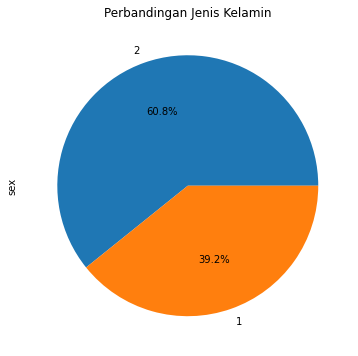

In [8]:
# Plot Jenis Kelamin Nasabah Kartu Kredit

data['sex'].value_counts().plot.pie(figsize=(6, 6), autopct='%1.1f%%', title='Perbandingan Jenis Kelamin')

> Data ini memliki perbandingan jenis kelamin nasabah pengguna kartu kredit adalah Pria dilabelkan dengan 1 yang memiliki persentase 39.2%  berbanding  Wanita Dilabelkan dengan persentase sebesar 60.8%.

> Dari informasi yang didapat bisa diamil kesimpulan bahwa nasabah pengguna katu kredit terbanyak merupakan nasabah dengan jenis kelamin Wanita dengan total 1802 nasabah.

In [9]:
# Menmapilkan Usia Nasbah

age= data.groupby(['age'], sort=True).size().reset_index(name='total')
age['percentage %'] = (((age.total/data.shape[0]) * 100).round(1))
age

,age,total,percentage %
0,21.0,7,0.2
1,22.0,49,1.7
2,23.0,95,3.2
3,24.0,120,4.0
4,25.0,119,4.0
5,26.0,138,4.7
6,27.0,146,4.9
7,28.0,138,4.7
8,29.0,149,5.0
9,30.0,171,5.8


<AxesSubplot:title={'center':'Usia Nasabah Kartu Kredit'}>

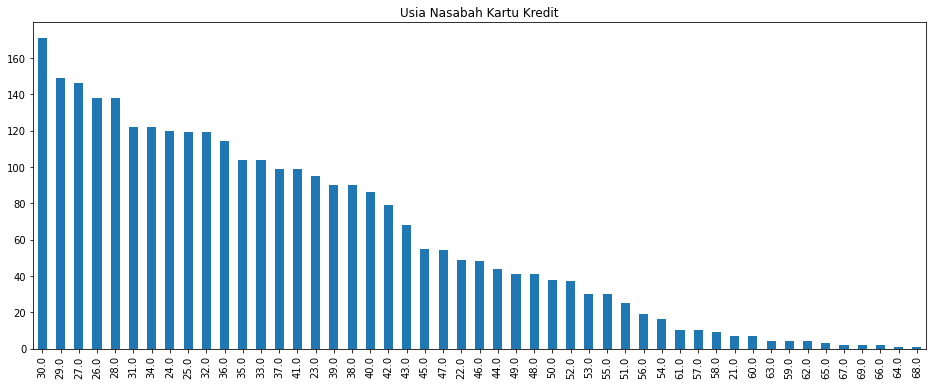

In [10]:
# Plot Usia Nasabah

data['age'].value_counts().plot.bar(figsize=(16, 6), title='Usia Nasabah Kartu Kredit')

> Usia nasabah pengguna kartu kredit berada pada rentang usia 21 sampai 69 tahun.

> Pengguna terbanyak berada pada usia 36 tahun dengan total 171 nasabah.

> Usia yang memiliki jumlah nasabah 100 orang beada pada rentang usai 24 sampai 36 tahun yang merupakan usia produkrf dan menjadi target kita.

In [11]:
# Menampilkan Latarbelakang pendidikan nasabah

edu_lvl= data.groupby(['education_level'], sort=True).size().reset_index(name='total')
edu_lvl['percentage %'] = (((edu_lvl.total/data.shape[0]) * 100).round(1))
edu_lvl.sort_values(by='total', ascending=False)

,education_level,total,percentage %
2,2,1400,47.2
1,1,1039,35.0
3,3,483,16.3
5,5,24,0.8
4,4,13,0.4
6,6,4,0.1
0,0,2,0.1


<AxesSubplot:title={'center':'Perbandingan Latarbelakang Pendidikan'}>

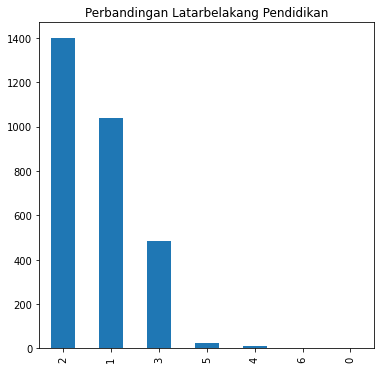

In [12]:
# Plot Latarbelakang pendidikan nasabah

data['education_level'].value_counts().plot.bar(figsize=(6, 6), title='Perbandingan Latarbelakang Pendidikan')

> Dari total 2965 baris data yang dimiliki, akan ditunjukkan lataerbelakang pendidikan setiap orang sebagai berikut :
, 

*   42,7 % atau 1400 orang memiliki latarbelakang pendidikan University (label 2),
*   35,0 % atau 1039 orang memiliki latarbelakang pendidikan Graduate School (label 1),
*   16,3 % atau 483 orang dengan latarbelakang pendidikan High School (label 3),
*   0,8 % atau 24 orang dengan latarbelakang pendidikan Unknown (label 5),
*   0,4 % atau 13 orang dengan latarbelakang pendidikan Other (label 4),
*   0,1 % atau 4 orang dengan latarbelakang pendidikan Unknown (label 6), dan
*   0,1 % atau 2 orang dengan latarbelakang pendidikan Unknown (label 0).

> Dari info yang dimiliki menunjukan bahwa mayoritas pengguna kartu kredit merupakan nasabah dengan latarbelakang pendidikan dari Universitas dengan total 1400 nasabah.

In [13]:
# Menampilkan status perkawinan nasabah

ms= data.groupby(['marital_status'], sort=True).size().reset_index(name='total')
ms['percentage %'] = (((ms.total/data.shape[0]) * 100).round(1))
ms.sort_values(by='total', ascending=False)

,marital_status,total,percentage %
2,2,1594,53.8
1,1,1332,44.9
3,3,35,1.2
0,0,4,0.1


<AxesSubplot:title={'center':'Perbandingan Jenis Kelamin'}>

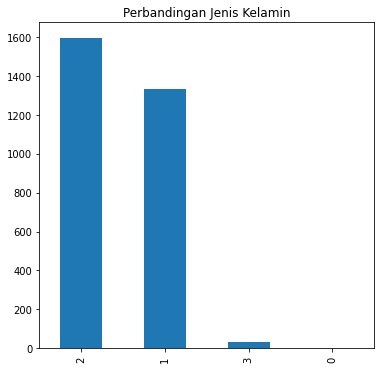

In [14]:
# Plot status perkawinan Nasabah Kartu Kredit

data['marital_status'].value_counts().plot.bar(figsize=(6, 6), title='Perbandingan Jenis Kelamin')

> Status perkawinan nasabah pengguna kartu kredit terdiri atas 4 kelompok yaitu : 

*   53.8 % atau 1594 orang memiliki status perkawinan menikah (label 2),
*   44.9 % atau 1332 orang memiliki status perkawinan belum kawin (label 1),
*   1.2 % atau 35 orang dengan status perkawainan lainnya (label 3),
*   0,1 % atau 4 orang dengan status perkawinan lainnya (label 0),

> Dari info yang dimiliki menunjukan bahwa perbandingan nasabah pemngguna kartu kredit yang sudah meniikah dan belum menikah memiliki perbandingan yang tidak terlalu jauh.

# Data Preprocessing

> Setelah melakukan eksplorasi terhadapa data yang dimiliki, selanjutnya dilakukan pengolahan prepocessing pada data.

In [15]:
# Split data menjadi X dan y

X = data.drop(['default_payment_next_month'], axis=1)
y = data['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
1,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
2,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
3,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0
4,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,120000.0,1,2,2,41.0,1.0,2.0,0.0,0.0,-1.0,...,27941.0,11990.0,390.0,390.0,0.0,1600.0,1000.0,390.0,390.0,0.0
2961,360000.0,1,1,1,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,390.0
2962,50000.0,1,2,1,61.0,2.0,-1.0,-1.0,-1.0,-1.0,...,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0
2963,50000.0,1,2,1,41.0,-1.0,-1.0,-1.0,0.0,-1.0,...,780.0,390.0,390.0,390.0,390.0,780.0,0.0,390.0,390.0,1170.0


> Dari data yang dimiliki, dilakukan split untuk memisahkan data fitur(X) dan data target(y).

> Data target atau y merupakan data dari fitur `default_payment_next_month` pada data sebelum dipecah atau di split.

> Data X dan data y masing-masing memiliki jumlah baris yang sama yaitu 2965 baris data.

In [16]:
# Split data pada X dan y menjadi data X_train, X_test dan y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

print('Ukuran X_train : ', X_train.shape)
print('Ukuran X_test  : ', X_test.shape)
print('Ukuran y_train : ', y_train.shape)
print('Ukuran y_test  : ', y_test.shape)

Ukuran X_train :  (2372, 23)
Ukuran X_test  :  (593, 23)
Ukuran y_train :  (2372,)
Ukuran y_test  :  (593,)


> Setelah memiliki data X dan y, selanjutnya dilakukan pembagian menjadi data X_train, X_test, y_train dan y_test dengan proporsi pembagian 80 berbanding 20 antara data train dan test yang sebelumnya uga dilakukan pengacakan menggunakan parameter random_state.

> Setelah membagi menjadi data latih dan uji pada X dan y dilanjutkan dengan melakukan pengecekan dan melakukan handling outliers pada data yang dimiliki jika terdapat outliers.

In [17]:
num_column= X_train.columns[X_train.dtypes != 'object'].tolist()
num_column

['limit_balance',
 'sex',
 'education_level',
 'marital_status',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

> num_column merupakan variebel yang menyimpan seluruh fitur data ke dalam bentuk list yang nantinya akan digunakan dalam proses perhitungan skew data dari setiap fitur. 

In [18]:
# Melakukan pengecekan skewness pada fitur dengan tipe data numerik pada data X_train

for col in num_column:                                                   
    print('Nilai Skew ' + X_train[col].name + ' = ' + str(X_train[col].skew()))

Nilai Skew limit_balance = 1.0047798675572603
Nilai Skew sex = -0.4678860628306146
Nilai Skew education_level = 0.8063179464529419
Nilai Skew marital_status = -0.03758461896207115
Nilai Skew age = 0.7823976562222427
Nilai Skew pay_0 = 0.8871516529464829
Nilai Skew pay_2 = 0.8409546193709779
Nilai Skew pay_3 = 0.9875984284224227
Nilai Skew pay_4 = 1.0941278905587755
Nilai Skew pay_5 = 1.0950662360535552
Nilai Skew pay_6 = 1.0451593715753738
Nilai Skew bill_amt_1 = 2.4933036226307617
Nilai Skew bill_amt_2 = 2.4516975982853406
Nilai Skew bill_amt_3 = 2.490479257700211
Nilai Skew bill_amt_4 = 2.424422755879672
Nilai Skew bill_amt_5 = 2.3971123172112003
Nilai Skew bill_amt_6 = 2.425027031146686
Nilai Skew pay_amt_1 = 12.066498913098414
Nilai Skew pay_amt_2 = 32.49296978997262
Nilai Skew pay_amt_3 = 8.193024645723321
Nilai Skew pay_amt_4 = 8.11064585418314
Nilai Skew pay_amt_5 = 11.745428181748286
Nilai Skew pay_amt_6 = 9.730208038595473


> Setelah dilakuakn pengecekan pencilan atau outliers, ditemukan bahwa padadata yang dimiliki semuanya memiliki outliers.

> Seluruh fitur memiliki ouliers bernilai positif atau right skew dengan nilai terkevil adalah pada fitur `education_level` dengan nilai 0.80632 dan nilai skew tertinggi dimiliki fitur `pay_amt` dengan nilai 32.493.

> Dari informasi yang didapat babrapa fitur memiliki nilai skew yang sangat tinggi atau heavy skew sehingga saya menggunakan distance 3 pada IQR untuk melakukan handling outliers.

In [19]:
# Membuat fungsi untuk mencari batas bawah dan atas dari fitur

def find_skewed_boundaries(data, variable, distance):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = data[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

> Fungsi diatas digunkana untuk menghitung nilai batas atas dan batas bawah skew dari tiap fitur yang dimiliki yang nantinya akan digunakan saat triming data yang memiliki outliers.

In [20]:
# Memanggil fungsi find_skewed_boundaries dari tiap fitur dan memberi nilai 3 sebagai distance IQR

limit_balance_upper_limit, limit_balance_lower_limit = find_skewed_boundaries(X_train, 'limit_balance', 3)
sex_upper_limit, sex_lower_limit = find_skewed_boundaries(X_train, 'sex', 3)
education_level_upper_limit, education_level_lower_limit = find_skewed_boundaries(X_train, 'education_level', 3)
marital_status_upper_limit, marital_status_lower_limit = find_skewed_boundaries(X_train, 'marital_status', 3)
age_upper_limit, age_lower_limit = find_skewed_boundaries(X_train, 'age', 3)
pay_0_upper_limit, pay_0_lower_limit = find_skewed_boundaries(X_train, 'pay_0', 3)
pay_2_upper_limit, pay_2_lower_limit = find_skewed_boundaries(X_train, 'pay_2', 3)
pay_3_upper_limit, pay_3_lower_limit = find_skewed_boundaries(X_train, 'pay_3', 3)
pay_4_upper_limit, pay_4_lower_limit = find_skewed_boundaries(X_train, 'pay_4', 3)
pay_5_upper_limit, pay_5_lower_limit = find_skewed_boundaries(X_train, 'pay_5', 3)
pay_6_upper_limit, pay_6_lower_limit = find_skewed_boundaries(X_train, 'pay_6', 3)
bill_amt_1_upper_limit, bill_amt_1_lower_limit = find_skewed_boundaries(X_train, 'bill_amt_1', 3)
bill_amt_2_upper_limit, bill_amt_2_lower_limit = find_skewed_boundaries(X_train, 'bill_amt_2', 3)
bill_amt_3_upper_limit, bill_amt_3_lower_limit = find_skewed_boundaries(X_train, 'bill_amt_3', 3)
bill_amt_4_upper_limit, bill_amt_4_lower_limit = find_skewed_boundaries(X_train, 'bill_amt_4', 3)
bill_amt_5_upper_limit, bill_amt_5_lower_limit = find_skewed_boundaries(X_train, 'bill_amt_5', 3)
bill_amt_6_upper_limit, bill_amt_6_lower_limit = find_skewed_boundaries(X_train, 'bill_amt_6', 3)
pay_amt_1_upper_limit, pay_amt_1_lower_limit = find_skewed_boundaries(X_train, 'pay_amt_1', 3)
pay_amt_2_upper_limit, pay_amt_2_lower_limit = find_skewed_boundaries(X_train, 'pay_amt_2', 3)
pay_amt_3_upper_limit, pay_amt_3_lower_limit = find_skewed_boundaries(X_train, 'pay_amt_3', 3)
pay_amt_4_upper_limit, pay_amt_4_lower_limit = find_skewed_boundaries(X_train, 'pay_amt_4', 3)
pay_amt_5_upper_limit, pay_amt_5_lower_limit = find_skewed_boundaries(X_train, 'pay_amt_5', 3)
pay_amt_6_upper_limit, pay_amt_6_lower_limit = find_skewed_boundaries(X_train, 'pay_amt_6', 3)

> Melakukan perhitungan dan pengambilan batas atas dan bawah dari tiap fitur dengan menggunakan IQR dengan distance 3 karena ada babarapa fitur memiliki heavy skew.

In [21]:
# Membuat variabel nutuk menyimpan data yang berada di rentang batas bawah sampai batas atas data dari masing-masing fitur di X_train

outliers_limit_balance = np.where(X_train['limit_balance'] > limit_balance_upper_limit, True,
                       np.where(X_train['limit_balance'] < limit_balance_lower_limit, True, False))
outliers_sex = np.where(X_train['sex'] > sex_upper_limit, True,
                       np.where(X_train['sex'] < sex_lower_limit, True, False))
outliers_education_level = np.where(X_train['education_level'] > education_level_upper_limit, True,
                       np.where(X_train['education_level'] < education_level_lower_limit, True, False))
outliers_marital_status = np.where(X_train['marital_status'] > marital_status_upper_limit, True,
                       np.where(X_train['marital_status'] < marital_status_lower_limit, True, False))
outliers_age= np.where(X_train['age'] > age_upper_limit, True,
                       np.where(X_train['age'] < age_lower_limit, True, False))
outliers_pay_0= np.where(X_train['pay_0'] > pay_0_upper_limit, True,
                       np.where(X_train['pay_0'] < pay_0_lower_limit, True, False))
outliers_pay_2= np.where(X_train['pay_2'] > pay_2_upper_limit, True,
                       np.where(X_train['pay_2'] < pay_2_lower_limit, True, False))
outliers_pay_3= np.where(X_train['pay_3'] > pay_3_upper_limit, True,
                       np.where(X_train['pay_3'] < pay_3_lower_limit, True, False))
outliers_pay_4= np.where(X_train['pay_4'] > pay_4_upper_limit, True,
                       np.where(X_train['pay_4'] < pay_4_lower_limit, True, False))
outliers_pay_5= np.where(X_train['pay_5'] > pay_5_upper_limit, True,
                       np.where(X_train['pay_5'] < pay_5_lower_limit, True, False))
outliers_pay_6= np.where(X_train['pay_6'] > pay_6_upper_limit, True,
                       np.where(X_train['pay_6'] < pay_6_lower_limit, True, False))
outliers_bill_amt_1= np.where(X_train['bill_amt_1'] > bill_amt_1_upper_limit, True,
                       np.where(X_train['bill_amt_1'] < bill_amt_1_lower_limit, True, False))
outliers_bill_amt_2= np.where(X_train['bill_amt_2'] > bill_amt_2_upper_limit, True,
                       np.where(X_train['bill_amt_2'] < bill_amt_2_lower_limit, True, False))
outliers_bill_amt_3= np.where(X_train['bill_amt_3'] > bill_amt_3_upper_limit, True,
                       np.where(X_train['bill_amt_3'] < bill_amt_3_lower_limit, True, False))
outliers_bill_amt_4= np.where(X_train['bill_amt_4'] > bill_amt_4_upper_limit, True,
                       np.where(X_train['bill_amt_4'] < bill_amt_4_lower_limit, True, False))
outliers_bill_amt_5= np.where(X_train['bill_amt_5'] > bill_amt_5_upper_limit, True,
                       np.where(X_train['bill_amt_5'] < bill_amt_5_lower_limit, True, False))
outliers_bill_amt_6= np.where(X_train['bill_amt_6'] > bill_amt_6_upper_limit, True,
                       np.where(X_train['bill_amt_6'] < bill_amt_6_lower_limit, True, False))
outliers_pay_amt_1= np.where(X_train['pay_amt_1'] > pay_amt_1_upper_limit, True,
                       np.where(X_train['pay_amt_1'] < pay_amt_1_lower_limit, True, False))
outliers_pay_amt_2= np.where(X_train['pay_amt_2'] > pay_amt_2_upper_limit, True,
                       np.where(X_train['pay_amt_2'] < pay_amt_2_lower_limit, True, False))
outliers_pay_amt_3= np.where(X_train['pay_amt_3'] > pay_amt_3_upper_limit, True,
                       np.where(X_train['pay_amt_3'] < pay_amt_3_lower_limit, True, False))
outliers_pay_amt_4= np.where(X_train['pay_amt_4'] > pay_amt_4_upper_limit, True,
                       np.where(X_train['pay_amt_4'] < pay_amt_4_lower_limit, True, False))
outliers_pay_amt_5= np.where(X_train['pay_amt_5'] > pay_amt_5_upper_limit, True,
                       np.where(X_train['pay_amt_5'] < pay_amt_5_lower_limit, True, False))
outliers_pay_amt_6= np.where(X_train['pay_amt_6'] > pay_amt_6_upper_limit, True,
                       np.where(X_train['pay_amt_6'] < pay_amt_6_lower_limit, True, False))


> Setelah mendapat batas atas dan bawah distribusi data, sealnjutnya dilakukan perhitungan untuk pengambilan nilai didalam rentang batas atas dan bawah tiap fitur yang outliernya akan dihapus.

In [22]:
# Memanggil data yang sudah berada pada rentang batas atas dan batas bawah tiap data dan disimpan pada X_train_trim

X_train_trim = X_train.loc[~(outliers_limit_balance + outliers_sex + outliers_education_level + outliers_marital_status + outliers_age + outliers_pay_0 + outliers_pay_2 + outliers_pay_3 + outliers_pay_4 + outliers_pay_5 + outliers_pay_6 + outliers_bill_amt_1 + outliers_bill_amt_2 + outliers_bill_amt_3 + outliers_bill_amt_4 + outliers_bill_amt_5 + outliers_bill_amt_6 + outliers_pay_amt_1 + outliers_pay_amt_2 + outliers_pay_amt_3 + outliers_pay_amt_4 + outliers_pay_amt_5+ outliers_pay_amt_6)]

# Menampilkan shape data sebelum dan setelah trimming

print('Shape data X_train sebelum trimming : ', X_train.shape)
print('Shape data X_train setelah trimming  : ', X_train_trim.shape)

Shape data X_train sebelum trimming :  (2372, 23)
Shape data X_train setelah trimming  :  (1810, 23)


> Melakukan triming data yang tidak masuk dalam rentang batas atas dan batas bawah distribusi data dari tiap fitur yang dimiliki.

> Sebelum dilakukan triming outliers, daya yang dimiliki `X_train` sebanyak 2372 baris data dan setelah dilakukan triming data yang dimiliki sejumlah 1080 baris data yang disimpan pada variabel `X_train_trim`.

> Data pada X_train_trim digunakan pada proses pemodelan nantinya.

In [23]:
# Memanggil data yang sudah berada pada rentang batas atas dan batas bawah tiap data dan disimpan pada X_train_trim

y_train_trim = y_train.loc[~(outliers_limit_balance + outliers_sex + outliers_education_level + outliers_marital_status + outliers_age + outliers_pay_0 + outliers_pay_2 + outliers_pay_3 + outliers_pay_4 + outliers_pay_5 + outliers_pay_6 + outliers_bill_amt_1 + outliers_bill_amt_2 + outliers_bill_amt_3 + outliers_bill_amt_4 + outliers_bill_amt_5 + outliers_bill_amt_6 + outliers_pay_amt_1 + outliers_pay_amt_2 + outliers_pay_amt_3 + outliers_pay_amt_4 + outliers_pay_amt_5+ outliers_pay_amt_6)]

# Menampilkan shape data sebelum dan setelah trimming

print('Shape data y_train sebelum trimming : ', y_train.shape)
print('Shape data y_train setelah trimming  : ', y_train_trim.shape)

Shape data y_train sebelum trimming :  (2372,)
Shape data y_train setelah trimming  :  (1810,)


> Selain pada X_train, triming juga dilakuka pada y_train agar dimensi data antara X dan y memiliki kesamaan. Data `y_train` yang sudah ditrim disimpan pada variabel baru bernama `y_train_trim`.

In [24]:
# Menampilkan kolom data numerikal dan menyimpan pada list

num_columns = X_train_trim.select_dtypes(include=np.number).columns.tolist()

print('Num Columns : ', num_columns)

Num Columns :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


In [25]:
# Menyimpan hasil trim yang sudah dalam bentuk listke variable baru yaitu X_train_fix

X_train_fix = X_train_trim[num_columns]

> Menyimpan data X_train_trim yang berbentuk list ke dalam `X_train_fix` yang nantiya akan digunakan untuk scaling data. 

In [26]:
# Melakukan feature scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_fix)

X_train_scaled = scaler.transform(X_train_fix)
X_test_scaled = scaler.transform(X_test)

> Melakukan scaling pada X_train_fix dan X_test menggunakan MinMaxScaller dan disimpan pada X_train_scaled dan X_test_scaled.

In [27]:
# Menampilkan X_train setelah di scaling menggunakan MinMaxScaler

X_train_scaled

array([[0.        , 1.        , 0.4       , ..., 0.1997071 , 0.        ,
        0.24583916],
       [0.06493506, 1.        , 0.4       , ..., 0.11236853, 0.06724045,
        0.06352433],
       [0.01298701, 1.        , 0.6       , ..., 0.03035548, 0.01001883,
        0.01213315],
       ...,
       [0.02597403, 0.        , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.03896104, 0.        , 0.4       , ..., 0.09985355, 0.10086068,
        0.18904841],
       [0.01298701, 0.        , 0.4       , ..., 0.        , 0.16810113,
        0.        ]])

In [28]:
# Menampilkan X_test setelah di scaling menggunakan MinMaxScaler

X_test_scaled

array([[0.05194805, 0.        , 0.2       , ..., 0.04340301, 0.05567509,
        0.06079278],
       [0.32467532, 0.        , 0.4       , ..., 0.09219811, 0.        ,
        0.11275569],
       [0.15584416, 0.        , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01298701, 1.        , 0.2       , ..., 0.03994142, 0.10086068,
        0.06352433],
       [0.22077922, 0.        , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.06493506, 1.        , 0.2       , ..., 0.        , 0.01008607,
        0.01270487]])

In [29]:
# Menyimpan hasil scaling ke dalam dataframe

X_train_final = pd.DataFrame(X_train_scaled)
X_test_final = pd.DataFrame(X_test_scaled)

> Setelah dilakukan scaling emnggunakan MinMaxScaller, hasil scale disimpan kedalam dataframe pada variabel baru bernama `X_train_final` dan `X_test_final` yang nantinya variabel tersebut akan digunakan dalam pemodelan pada tahapan selanjutnya. 

In [30]:
# Menampilkan 10 data paling atas dari variabel X_train_final

X_train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000000,1.0,0.4,0.666667,0.020833,0.2,0.2,0.8,0.4,0.4,...,0.120153,0.191889,0.211126,0.214093,0.230840,0.000000,0.121212,0.199707,0.000000,0.245839
1,0.064935,1.0,0.4,1.000000,0.145833,0.4,0.4,0.4,0.4,0.4,...,0.162786,0.282882,0.258693,0.254120,0.075023,0.148934,0.060606,0.112369,0.067240,0.063524
2,0.012987,1.0,0.6,0.333333,0.458333,0.8,0.4,0.4,0.4,0.4,...,0.167595,0.251182,0.263543,0.206970,0.075023,0.089360,0.076182,0.030355,0.010019,0.012133
3,0.298701,1.0,0.2,0.666667,0.166667,0.2,0.8,0.8,0.0,0.0,...,0.097405,0.177585,0.187841,0.192522,0.036127,0.037293,0.037939,0.051658,0.052649,0.079532
4,0.051948,1.0,0.6,0.666667,0.104167,0.6,0.8,0.8,0.8,0.8,...,0.219894,0.297663,0.320800,0.325959,0.103878,0.113190,0.000000,0.173079,0.000000,0.107991


# Model

## Logistic Regression

### Model Definition

In [31]:
# Pendefinisian Model Logistic Regression

logreg = linear_model.LogisticRegression()

> Melakukan pendefinisian logistic regression dan menyimpan pada variabel logreg.

### Model Training Baseline

In [32]:
# Training Model Logistic Regression

logreg.fit(X_train_final, y_train_trim)

LogisticRegression()

> Melakukan training logistic regressio pada data training yang dimiliki.

### Model Evaluation Baseline

F1 Score - Train Set  :  0.44480519480519476 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1377
           1       0.75      0.32      0.44       433

    accuracy                           0.81      1810
   macro avg       0.78      0.64      0.67      1810
weighted avg       0.80      0.81      0.78      1810
 

Confusion Matrix      : 


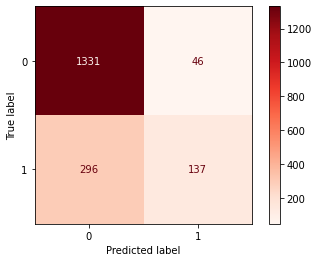

In [33]:
# Evaluasi Performa Model logistic regression

y_pred_train_logreg = logreg.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train_trim, y_pred_train_logreg), '\n')
print('Classification Report : \n', classification_report(y_train_trim, y_pred_train_logreg), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, X_train_final, y_train_trim, cmap='Reds'))

> Setelah dilakukan training pada data train yang dimiliki menggunakan logistic regression dengan menggunakan parameter baseline, didapatkan nilai f1-score label 1 atau TP dan TN benilai 0.445. dengan akurasi sebesar 0.81 atau 81 %

In [34]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

f1_score_train_cross_val_logreg = cross_val_score(logreg, 
                                           X_train_final, 
                                           y_train_trim, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_logreg)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_logreg.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_logreg.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_logreg.mean()-f1_score_train_cross_val_logreg.std()) , '-', (f1_score_train_cross_val_logreg.mean()+f1_score_train_cross_val_logreg.std()))

F1 Score - All - Cross Validation  :  [0.38423645 0.45933014 0.42211055]
F1 Score - Mean - Cross Validation :  0.4218923831688198
F1 Score - Std - Cross Validation  :  0.03065725885387515
F1 Score - Range of Test-Set       :  0.3912351243149446 - 0.45254964202269493
CPU times: user 96.4 ms, sys: 63.5 ms, total: 160 ms
Wall time: 101 ms


> Dilakukan pengecekan mengguakan cross validation pada nilai f1-score yang bertujuan untuk mengetahui konsistensi pada model yang dibuat.

> Hasil cross validation menunjukkan nilai 0.38423645 0.45933014 0.42211055. Dari informasi tersebut dapat terlihat bahwa model yang dibangun terlihat tidak konsisten. Rataan f1-score dari pengujian 3 fold adalah 0.4218923831688198.

> Rentang nilai f1-score pada test set berada diantara nilai 0.3912351243149446 - 0.45254964202269493.

F1 Score - Test Set   :  0.4712041884816754 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       468
           1       0.68      0.36      0.47       125

    accuracy                           0.83       593
   macro avg       0.77      0.66      0.68       593
weighted avg       0.81      0.83      0.81       593
 

Confusion Matrix      : 


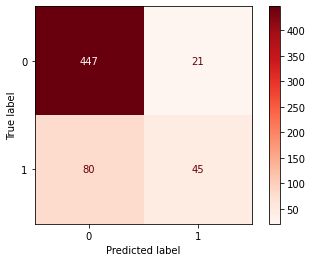

In [35]:
# Cek Performa Model

y_pred_test_logreg = logreg.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_logreg), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_logreg), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, X_test_final, y_test, cmap='Reds'))

In [36]:
# Tampilkan Hasil Uji Model

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_logreg),
    'train - recall' : recall_score(y_train_trim, y_pred_train_logreg),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_logreg),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_logreg),
    'test - precision' : precision_score(y_test, y_pred_test_logreg),
    'test - recall' : recall_score(y_test, y_pred_test_logreg),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_logreg),
    'test - f1_score' : f1_score(y_test, y_pred_test_logreg),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.829680
test - f1_score,0.471204
test - precision,0.681818
test - recall,0.360000
train - accuracy,0.811050
train - f1_score,0.444805
train - precision,0.748634
train - recall,0.316397


> Dari inforamsi yang didapat pada logistic regresion  dengan menggunakan default hyperparameter ditunjukkan adanya overfit pada data yang dimiliki karena nilai f1-score pada test lebih rendah daripada train.

> f1-score train memiliki nilai 0.445 dan f1-score pada test memiliki nilai 0.471.

### Model Training Grid Search

> Mencari hyperparameter terbaik menggunakan grid search.

In [37]:
# Latih Dengan Grid Search Untuk Menentukan Hyperparameter Terbaik
%%time
param_grid = {
              'C': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 3, 4.5],  
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'multi_class' : ['auto', 'ovr']
              }
logreg_gridcv = GridSearchCV(estimator=linear_model.LogisticRegression(),
                         param_grid=param_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1')

logreg_gridcv.fit(X_train_final, y_train_trim)


Fitting 3 folds for each of 96 candidates, totalling 288 fits
CPU times: user 498 ms, sys: 128 ms, total: 626 ms
Wall time: 12.3 s


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 3, 4.5],
                         'multi_class': ['auto', 'ovr'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1', verbose=2)

> Pada pencarian hyperparam terbaik pada logistic regression, parameter yang digunakan adalah C, solver, dan multi_class yang dilakukan fit sebanyak 3 fold.

In [38]:
# Menampilkan Hyperparameters Terbaik Pada Logistic Regression
logreg_gridcv.best_estimator_

LogisticRegression(C=4.5)

In [39]:
logreg_gridcv.best_params_

{'C': 4.5, 'multi_class': 'auto', 'solver': 'lbfgs'}

> Setelah dilakukan trainterhadap data menggunakan parameter yang sudah ditentukan diatas, didapatkan hyperparameter terbaik menurut gridsearch yaitu menentukan nilai 'C'dengan nilai 4.5, 'multi_class' : 'auto' dan menggunakan lbfgs sebagai solver.

> Selanjutnya hperparameter tersebut akan disimpan pada `logreg_gridcv_best` untuk dilakukan evaluasi pada data test agar dapat diketahui pengaruhnya terhadap akurasi model.

In [40]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel logreg_gridcv_best

logreg_gridcv_best = logreg_gridcv.best_estimator_

### Model Evaluation Grid Search

F1 Score - Test Set   :  0.4712041884816754 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       468
           1       0.68      0.36      0.47       125

    accuracy                           0.83       593
   macro avg       0.77      0.66      0.68       593
weighted avg       0.81      0.83      0.81       593
 

Confusion Matrix      : 


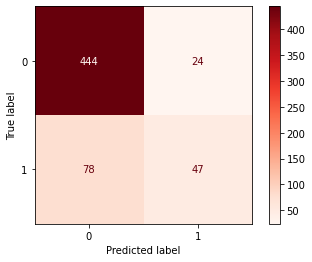

In [41]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_logreg_grid = logreg_gridcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_logreg), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_logreg), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_gridcv_best, X_test_final, y_test, cmap='Reds'))

> Hperparameter terbaik menurut grid search diterpakan pada testing data.

> Hasil uji menunjukkan bahwa f1-score bernilai 0.4712 dengan akurasi sebesar 0.83 atau 83 %

In [42]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_logreg),
    'train - recall' : recall_score(y_train_trim, y_pred_train_logreg),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_logreg),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_logreg),
    'test - precision' : precision_score(y_test, y_pred_test_logreg_grid),
    'test - recall' : recall_score(y_test, y_pred_test_logreg_grid),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_logreg_grid),
    'test - f1_score' : f1_score(y_test, y_pred_test_logreg_grid),
}
all_reports['Grid Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - precision,0.748634,0.748634
train - recall,0.316397,0.316397
train - accuracy,0.811050,0.811050
train - f1_score,0.444805,0.444805
test - precision,0.681818,0.661972
test - recall,0.360000,0.376000
test - accuracy_score,0.829680,0.827993
test - f1_score,0.471204,0.479592


> Tidak terdapat perubahan yang signifikan pada hasil uji setelah dilakukan perubahan hyperparam menggunkan hyperparam terbaik menurut grid search.

### Model Training Random Search

In [43]:
random_grid = {'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
               'C': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 3, 4.5],
               'penalty':['l1','l1', '‘elasticnet']}
random_grid

{'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'C': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 3, 4.5],
 'penalty': ['l1', 'l1', '‘elasticnet']}

> Mencari hyperparam terbaik menggunakan random search, dengan nyperparam yang akan diujikan adalah solver, C dan penalty.

In [44]:
# Train with Random Search
%%time

logreg_randomcv = RandomizedSearchCV(estimator=linear_model.LogisticRegression(),
                         param_distributions=random_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1')
logreg_randomcv.fit(X_train_final, y_train_trim)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 79.7 ms, sys: 7.45 ms, total: 87.2 ms
Wall time: 397 ms


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/util

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 3,
                                              4.5],
                                        'penalty': ['l1', 'l1', '‘elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='f1', verbose=2)

> 3 hyperparameter yaitu solver, C, dan penalty diujikan pada data latih untuk menemukan hyperparameter terbaik.

In [45]:
# Menampilkan Hyperparameters Terbaik Pada Logritic Regression
logreg_randomcv.best_estimator_

LogisticRegression(C=0.4, penalty='l1', solver='liblinear')

In [46]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel logreg_gridcv_best

logreg_randomcv_best = logreg_randomcv.best_estimator_

> Hyperparam terbaik menurut random search adalah dengan nilai C = 0.4, penalty menggunakan l2 dan solver menggunakan liblinear.

> Hyperparameter terbaik menurut random search akan diujikan pada data tes untuk mengetahui akurasinya.

### Model Evaluataion Random Search

F1 Score - Test Set   :  0.454054054054054 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       468
           1       0.70      0.34      0.45       125

    accuracy                           0.83       593
   macro avg       0.77      0.65      0.68       593
weighted avg       0.81      0.83      0.81       593
 

Confusion Matrix      : 


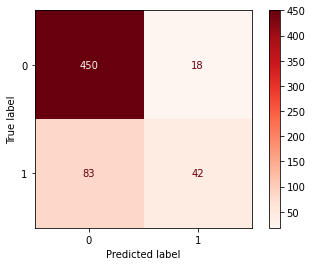

In [47]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_logreg_rand = logreg_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_logreg_rand), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_logreg_rand), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_randomcv_best, X_test_final, y_test, cmap='Reds'))

> Dari hyperparam terbaik menurut random search yang ditemukan dan diujikan pada data tes didapatkan hasil f1-score senilai 0.454 dan akurasi 0.83 atau 83%.

In [48]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_logreg),
    'train - recall' : recall_score(y_train_trim, y_pred_train_logreg),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_logreg),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_logreg),
    'test - precision' : precision_score(y_test, y_pred_test_logreg_rand),
    'test - recall' : recall_score(y_test, y_pred_test_logreg_rand),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_logreg_rand),
    'test - f1_score' : f1_score(y_test, y_pred_test_logreg_rand),
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search,Random Search
train - precision,0.748634,0.748634,0.748634
train - recall,0.316397,0.316397,0.316397
train - accuracy,0.811050,0.811050,0.811050
train - f1_score,0.444805,0.444805,0.444805
test - precision,0.681818,0.661972,0.700000
test - recall,0.360000,0.376000,0.336000
test - accuracy_score,0.829680,0.827993,0.829680
test - f1_score,0.471204,0.479592,0.454054


> Dari hasil pencarian hyperparameter terbaik, hyperparameter yang ditentukan menggunakan Random Search merupakan yang terbaik. Hal itu disebabkan karena meskipun overfit namun jarak anatar f1-score train dan f1-score test tidak terlalu jauh.

> Nilai f1-score train sebesar 0.445 dan f1-score test seebsar 0.454 dengan akurasi sebesar 82.96%.

> Hyperparameter dari hasil pencarian random search akan digunakan pada pemodelan.

> Hyperparameternya adalah `LogisticRegression(C=0.4, penalty='l1', solver='liblinear')`

## SVM

### Model Definition

In [49]:
# Pendefinisian Model SVC

svc = SVC()

> Melakukan pendefinisan support vector classifier

### Model Training Baseline

In [50]:
# Training Model SVC 

svc.fit(X_train_final, y_train_trim)

SVC()

> Melakukan training pada data training dengan menggunakan baseline hyperparameter.

### Model Evaluation Baseline

F1 Score - Train Set  :  0.5349544072948328 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1377
           1       0.78      0.41      0.53       433

    accuracy                           0.83      1810
   macro avg       0.81      0.69      0.72      1810
weighted avg       0.82      0.83      0.81      1810
 

Confusion Matrix      : 


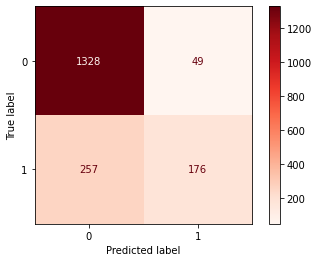

In [51]:
# Evaluasi Performa Model SVC

y_pred_train_svc = svc.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train_trim, y_pred_train_svc), '\n')
print('Classification Report : \n', classification_report(y_train_trim, y_pred_train_svc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_train_final, y_train_trim, cmap='Reds'))

In [52]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

f1_score_train_cross_val_svc = cross_val_score(svc, 
                                           X_train_final, 
                                           y_train_trim, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_svc)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_svc.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_svc.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_svc.mean()-f1_score_train_cross_val_svc.std()) , '-', (f1_score_train_cross_val_svc.mean()+f1_score_train_cross_val_svc.std()))

F1 Score - All - Cross Validation  :  [0.48181818 0.47747748 0.44444444]
F1 Score - Mean - Cross Validation :  0.46791336791336796
F1 Score - Std - Cross Validation  :  0.016689381956521383
F1 Score - Range of Test-Set       :  0.4512239859568466 - 0.4846027498698893
CPU times: user 442 ms, sys: 1.14 ms, total: 443 ms
Wall time: 751 ms


F1 Score - Test Set   :  0.459016393442623 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       468
           1       0.72      0.34      0.46       125

    accuracy                           0.83       593
   macro avg       0.78      0.65      0.68       593
weighted avg       0.82      0.83      0.81       593
 

Confusion Matrix      : 


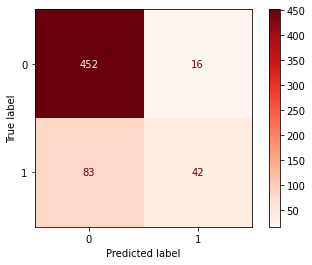

In [53]:
# Cek Performa Model

y_pred_test_svc = svc.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svc), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_test_final, y_test, cmap='Reds'))

In [54]:
# Tampilkan Hasil Uji Model

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_svc),
    'train - recall' : recall_score(y_train_trim, y_pred_train_svc),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_svc),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_svc),
    'test - precision' : precision_score(y_test, y_pred_test_svc),
    'test - recall' : recall_score(y_test, y_pred_test_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc),
    'test - f1_score' : f1_score(y_test, y_pred_test_svc),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.833052
test - f1_score,0.459016
test - precision,0.724138
test - recall,0.336000
train - accuracy,0.830939
train - f1_score,0.534954
train - precision,0.782222
train - recall,0.406467


> Pada baseline hyperparameter pada SVC yang digunakan, f1-score pada train memiliki nilia 0.535 dan pada test memiliki nilai 0.459 yang mana model menggunakan baseline hyperparameter svm memiliki model yang overfit.

> Akurasi pada baseline hyperparameter svc memiliki nilai 0.830 pada train dan 0.833 pada test.

### Model Training Grid Search

In [55]:
# Latih Dengan Grid Search Untuk Menentukan Hyperparameter Terbaik
%%time
param_grid = {'C': [0.1, 0.5, 1.0, 3.0], 'gamma': [0.01, 0.1, 1.0],'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 
              'coef0' : [0.01, 0.1, 0.5, 1.0]
              }
svc_gridcv = GridSearchCV(estimator=SVC(),
                         param_grid=param_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1')

svc_gridcv.fit(X_train_final, y_train_trim)


Fitting 3 folds for each of 192 candidates, totalling 576 fits
CPU times: user 1.99 s, sys: 169 ms, total: 2.16 s
Wall time: 1min 2s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0, 3.0],
                         'coef0': [0.01, 0.1, 0.5, 1.0],
                         'gamma': [0.01, 0.1, 1.0],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='f1', verbose=2)

> Mencari hyperparameter SVC terbaik menggunakan grid search. hyperparameter yeng ditentukan adalah nilai C, gamma, kernel dan cofe0. dilakukan training untuk mencari hyperparam terbaik dengan fit 3 fold dan verbose 2 sengan target f1-score.

In [56]:
# Menampilkan Hyperparameters Terbaik Pada SVC
svc_gridcv.best_estimator_

SVC(coef0=0.01, gamma=0.01, kernel='linear')

In [57]:
svc_gridcv.best_params_

{'C': 1.0, 'coef0': 0.01, 'gamma': 0.01, 'kernel': 'linear'}

> Setelah dilakukan train menggunakan hyperparameter yang digunakan, didapatkan hyperparameter terbaik menurut grid search yaitu dengan nilai C = 1, coef0 = 0.01, nilai gamma = 0.01 dan menggunakan kernel linear.

In [58]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel svc_gridcv_best

svc_gridcv_best = svc_gridcv.best_estimator_

> Hyperparameter terbaik yang sudah ditemukan diujikan pada data test untuk melihat seberapa besar pengaruh pada hasil test data.

### Model Evaluation Grid Search

F1 Score - Test Set   :  0.459016393442623 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       468
           1       0.72      0.34      0.46       125

    accuracy                           0.83       593
   macro avg       0.78      0.65      0.68       593
weighted avg       0.82      0.83      0.81       593
 

Confusion Matrix      : 


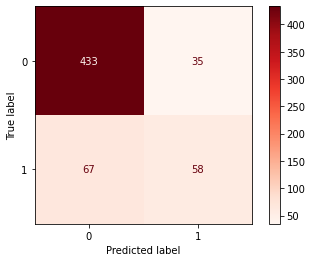

In [59]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_svc_grid = svc_gridcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svc), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_gridcv_best, X_test_final, y_test, cmap='Reds'))

In [60]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_svc),
    'train - recall' : recall_score(y_train_trim, y_pred_train_svc),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_svc),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_svc),
    'test - precision' : precision_score(y_test, y_pred_test_svc_grid),
    'test - recall' : recall_score(y_test, y_pred_test_svc_grid),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc_grid),
    'test - f1_score' : f1_score(y_test, y_pred_test_svc_grid),
}
all_reports['Grid Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - precision,0.782222,0.782222
train - recall,0.406467,0.406467
train - accuracy,0.830939,0.830939
train - f1_score,0.534954,0.534954
test - precision,0.724138,0.623656
test - recall,0.336000,0.464000
test - accuracy_score,0.833052,0.827993
test - f1_score,0.459016,0.532110


> Pada f1-score train menggunakan baseline dan grid search didapat nilai 0.534954 yang mana menunjukkan tidak terdapat perubahan yang signifikan meskipun hyperparameter telah diubah. Namun pada test, nilai f1-score menggunakn gridsearch memiliki nilai lebih tinggi yaitu 0.532110 dan pada baseline 0.459016.

> Akurasi pada kedua hyperparameter baik menggunakan baseline maupun grid search tidak memiliki perbedan yang signifikan.

> Hasil f1-score train menggunakan grid search bernilai 0.535 dan pada test memiliki nilai 0.532. Perbedaan tidak terlalu jauh, data dapat dikategorikan good fit. 

> 'C': 1.0, 'coef0': 0.01, 'gamma': 0.01, 'kernel': 'linear'

### Model Training Random Search

In [61]:
random_grid = {'C': [0.1, 0.5, 1.0, 3.0], 'gamma': [0.01, 0.1, 1.0],'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 
              'coef0' : [0.01, 0.1, 0.5, 1.0]}
random_grid

{'C': [0.1, 0.5, 1.0, 3.0],
 'gamma': [0.01, 0.1, 1.0],
 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
 'coef0': [0.01, 0.1, 0.5, 1.0]}

> Selanjutnya akan dilakukan pencarian hyperparameter terbaik menggunakan random search. Hyperparam yang dijadikan patokan sama sama dengan grid search yaitu C, gamma, kernel dan coef0.

In [62]:
# Train with Random Search
%%time

svc_randomcv = RandomizedSearchCV(estimator=SVC(),
                         param_distributions=random_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1')
svc_randomcv.fit(X_train_final, y_train_trim)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 208 ms, sys: 14.1 ms, total: 222 ms
Wall time: 2.4 s


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 1.0, 3.0],
                                        'coef0': [0.01, 0.1, 0.5, 1.0],
                                        'gamma': [0.01, 0.1, 1.0],
                                        'kernel': ['rbf', 'poly', 'sigmoid',
                                                   'linear']},
                   scoring='f1', verbose=2)

In [63]:
# Menampilkan Hyperparameters Terbaik Pada SVC
svc_randomcv.best_estimator_

SVC(C=3.0, coef0=1.0, gamma=1.0)

> Dari hasil uji seluruh hyperparam pada data train, didapat bahwa hyperparameter terbaik menurut random search  adalah SVC(C=3.0, coef0=1.0, gamma=1.0).

> Hyperparameter tersebut akan diujikan pada data tes untuk melihat nilai akurasinya.

In [64]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel svc_randomcv_best

svc_randomcv_best = svc_randomcv.best_estimator_

### Model Evaluation Random Search

F1 Score - Test Set   :  0.4893617021276595 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       468
           1       0.73      0.37      0.49       125

    accuracy                           0.84       593
   macro avg       0.79      0.67      0.70       593
weighted avg       0.83      0.84      0.82       593
 

Confusion Matrix      : 


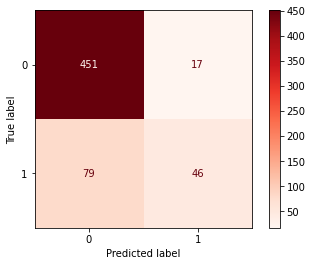

In [65]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_svc_rand = svc_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svc_rand), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svc_rand), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_randomcv_best, X_test_final, y_test, cmap='Reds'))

> Hyperparameter hasil random search yang digunakan pada uji di data test menunjukkan nilia f1-score sebesar 0.49 dengan akurasi seebsar 0.84 atau 84%

In [66]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_svc),
    'train - recall' : recall_score(y_train_trim, y_pred_train_svc),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_svc),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_svc),
    'test - precision' : precision_score(y_test, y_pred_test_svc_rand),
    'test - recall' : recall_score(y_test, y_pred_test_svc_rand),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc_rand),
    'test - f1_score' : f1_score(y_test, y_pred_test_svc_rand),
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search,Random Search
train - precision,0.782222,0.782222,0.782222
train - recall,0.406467,0.406467,0.406467
train - accuracy,0.830939,0.830939,0.830939
train - f1_score,0.534954,0.534954,0.534954
test - precision,0.724138,0.623656,0.730159
test - recall,0.336000,0.464000,0.368000
test - accuracy_score,0.833052,0.827993,0.838111
test - f1_score,0.459016,0.532110,0.489362


> Dari hasil pengujian terhadap hyperparameter baseline, terbaik menurut grid search dan random search ditemukan bahwa Hyperparameter Grid Search merupakan yang terbaik karena hasil f1-score train dan f1-score test cenderung good fit dan akurasinya tidak memiliki perbedaan terlalu jauh masih di kisaran 83%

>  Hyperparameter dari hasil pencarian grid search akan digunakan pada pemodelan.

> Hyperparameternya adalah `SVC('C': 1.0, 'coef0': 0.01, 'gamma': 0.01, 'kernel': 'linear')`

## Decision Tree

### Model Definition

In [67]:
# Pendefinisian Model Decision Tree

dt = DecisionTreeClassifier()

> Melakukan pendefinisian decsion tree classifier

### Model Training Baseline

In [68]:
# Training Model Decision Tree

dt.fit(X_train_final, y_train_trim)

DecisionTreeClassifier()

> Melakukan train pada data train menggunakan dt dengan baseline hyperparameter.

### Model Evaluation Baseline

F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1377
           1       1.00      1.00      1.00       433

    accuracy                           1.00      1810
   macro avg       1.00      1.00      1.00      1810
weighted avg       1.00      1.00      1.00      1810
 

Confusion Matrix      : 


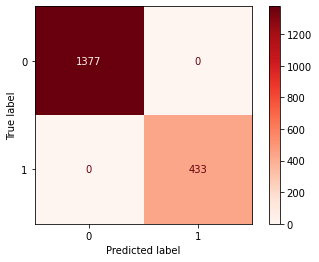

In [69]:
# Evaluasi Performa Model Decision Tree

y_pred_train_dt = dt.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train_trim, y_pred_train_dt), '\n')
print('Classification Report : \n', classification_report(y_train_trim, y_pred_train_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt, X_train_final, y_train_trim, cmap='Reds'))

In [70]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

f1_score_train_cross_val_dt = cross_val_score(dt, 
                                           X_train_final, 
                                           y_train_trim, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_dt)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_dt.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_dt.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_dt.mean()-f1_score_train_cross_val_dt.std()) , '-', (f1_score_train_cross_val_dt.mean()+f1_score_train_cross_val_dt.std()))

F1 Score - All - Cross Validation  :  [0.35555556 0.45544554 0.37254902]
F1 Score - Mean - Cross Validation :  0.39451670657261806
F1 Score - Std - Cross Validation  :  0.04363818609495469
F1 Score - Range of Test-Set       :  0.3508785204776634 - 0.43815489266757274
CPU times: user 96.4 ms, sys: 0 ns, total: 96.4 ms
Wall time: 99.9 ms


F1 Score - Test Set   :  0.4060150375939849 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       468
           1       0.38      0.43      0.41       125

    accuracy                           0.73       593
   macro avg       0.61      0.62      0.62       593
weighted avg       0.75      0.73      0.74       593
 

Confusion Matrix      : 


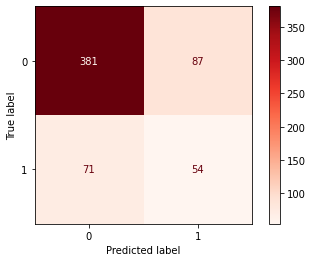

In [71]:
# Cek Performa Model

y_pred_test_dt = dt.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_dt), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt, X_test_final, y_test, cmap='Reds'))

In [72]:
# Tampilkan Hasil Uji Model

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_dt),
    'train - recall' : recall_score(y_train_trim, y_pred_train_dt),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_dt),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_dt),
    'test - precision' : precision_score(y_test, y_pred_test_dt),
    'test - recall' : recall_score(y_test, y_pred_test_dt),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dt),
    'test - f1_score' : f1_score(y_test, y_pred_test_dt),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.733558
test - f1_score,0.406015
test - precision,0.382979
test - recall,0.432000
train - accuracy,1.000000
train - f1_score,1.000000
train - precision,1.000000
train - recall,1.000000


> Dari informasi yang didapat, nilai f1-score train adalah 1.00 dan f1-score test adalah 0.406. Dari nilai f1-score dapat ditunjukkan bahwa model menggunakan baseline cederung overfit.

> Nilai akurasi pada train dan test juga menunjukan perbedaan yang signifikan dengan 100% pada train dan 73.35% pada test.

### Model Training Grid Search

In [73]:
# Latih Dengan Grid Search Untuk Menentukan Hyperparameter Terbaik
%%time
param_grid = {
              'criterion': ['gini', 'entropy'],  
              'splitter' : ['best', 'random'],
              'max_depth': [2, 3, 5, 10, 20, 40, 80, 100],
              'min_samples_leaf': [5, 10, 20, 50, 100],     
              }

dt_gridcv = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring = "f1")


dt_gridcv.fit(X_train_final, y_train_trim)


Fitting 3 folds for each of 160 candidates, totalling 480 fits
CPU times: user 281 ms, sys: 15.6 ms, total: 297 ms
Wall time: 5.44 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 40, 80, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=2)

> Melakukan training data pada data train menggunakan grid search dengan hyperparam yang ditenutkan adalah criterion, splitter, max_depth dan mn _samples_leaf.

In [74]:
# Menampilkan Hyperparameters Terbaik Pada decission tree
dt_gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, splitter='random')

In [75]:
dt_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'splitter': 'random'}

> Setelah dilatih, ditemukan hyperparameter terbaik menggunakan grid serach yaitu dengan criterion menggunakan gini, max_depth bernilai 3, min_sample_leaf bernilai 10 dan splitter menggunakan random split.

In [76]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel dt_gridcv_best

dt_gridcv_best = dt_gridcv.best_estimator_

### Model Evaluation Grid Search

F1 Score - Test Set   :  0.4680851063829786 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       468
           1       0.70      0.35      0.47       125

    accuracy                           0.83       593
   macro avg       0.77      0.66      0.68       593
weighted avg       0.82      0.83      0.81       593
 

Confusion Matrix      : 


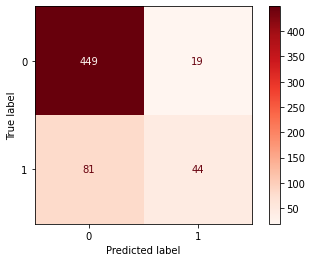

In [77]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_dt_grid = dt_gridcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_dt_grid), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_dt_grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_gridcv_best, X_test_final, y_test, cmap='Reds'))

> Hyperparameter yang didapat diujikan pada data test dan menghasilkan f1-score test bernilai 0.47 da nakurasi 0.83 atau 83%

In [78]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_dt),
    'train - recall' : recall_score(y_train_trim, y_pred_train_dt),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_dt),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_dt),
    'test - precision' : precision_score(y_test, y_pred_test_dt_grid),
    'test - recall' : recall_score(y_test, y_pred_test_dt_grid),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dt_grid),
    'test - f1_score' : f1_score(y_test, y_pred_test_dt_grid),
}
all_reports['Grid Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - precision,1.000000,1.000000
train - recall,1.000000,1.000000
train - accuracy,1.000000,1.000000
train - f1_score,1.000000,1.000000
test - precision,0.382979,0.698413
test - recall,0.432000,0.352000
test - accuracy_score,0.733558,0.831366
test - f1_score,0.406015,0.468085


> Hyperparameter yang ditemukan menggunakangrid search menghasilkan nilai f1-score pada train senilai 1 dan pada test senilai 0.468. Nilai tersebut menunjjukan bahwa data cenderung overfit.

### Model Training Random Search

In [79]:
random_grid_dt = {'criterion': ['gini', 'entropy'],  
              'splitter' : ['best', 'random'],
              'max_depth': [2, 3, 5, 10, 20, 40, 80, 100],
              'min_samples_leaf': [5, 10, 20, 50, 100]
               }
random_grid_dt

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 3, 5, 10, 20, 40, 80, 100],
 'min_samples_leaf': [5, 10, 20, 50, 100]}

> Pada random grid decision tree, hyperparameter yang digunakan adalah C, splitter, max_depth dan min_sample_leaf.

In [80]:
# Train with Random Search
%%time

dt_randomcv = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                         param_distributions=random_grid_dt,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1')
dt_randomcv.fit(X_train_final, y_train_trim)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 60.4 ms, sys: 1.31 ms, total: 61.7 ms
Wall time: 454 ms


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20, 40, 80,
                                                      100],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'splitter': ['best', 'random']},
                   scoring='f1', verbose=2)

> Parametert yang ada dilatih pada data latih untuk mendapatkan nilai akurasi dan melakukan pembelajaran model selain itu juga untuk mencari hyperparameter terbaik yang dicari menggunakan  random search.

In [81]:
# Menampilkan Hyperparameters Terbaik Pada decision tree
dt_randomcv.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, splitter='random')

In [82]:
dt_randomcv.best_params_

{'splitter': 'random',
 'min_samples_leaf': 20,
 'max_depth': 10,
 'criterion': 'gini'}

> Hyperparameter terbaik menurut random search adalah dengan max_depth 10, min_sample_leaf 20, menggnakan splitter random dan criterion gini.

In [83]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel dt_randomcv_best

dt_randomcv_best = dt_randomcv.best_estimator_

### Model Evaluation Random Search

F1 Score - Test Set   :  0.5128205128205129 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.90       468
           1       0.71      0.40      0.51       125

    accuracy                           0.84       593
   macro avg       0.79      0.68      0.71       593
weighted avg       0.83      0.84      0.82       593
 

Confusion Matrix      : 


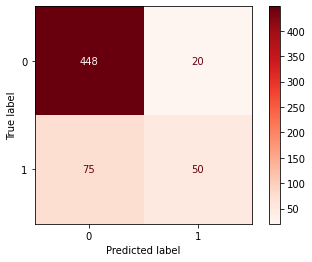

In [84]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_dt_rand = dt_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_dt_rand), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_dt_rand), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_test_final, y_test, cmap='Reds'))

> Hyperparameter terbaik menurut random search dilatihkan pada data uji, hasilnya f1-score test bernilai 0.51 dan aukrasi senilai 0.84 atau 84%.

In [85]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_dt),
    'train - recall' : recall_score(y_train_trim, y_pred_train_dt),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_dt),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_dt),
    'test - precision' : precision_score(y_test, y_pred_test_dt_rand),
    'test - recall' : recall_score(y_test, y_pred_test_dt_rand),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dt_rand),
    'test - f1_score' : f1_score(y_test, y_pred_test_dt_rand),
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search,Random Search
train - precision,1.000000,1.000000,1.000000
train - recall,1.000000,1.000000,1.000000
train - accuracy,1.000000,1.000000,1.000000
train - f1_score,1.000000,1.000000,1.000000
test - precision,0.382979,0.698413,0.714286
test - recall,0.432000,0.352000,0.400000
test - accuracy_score,0.733558,0.831366,0.839798
test - f1_score,0.406015,0.468085,0.512821


> Dari hasil pengujian terhadap hyperparameter baseline, terbaik menurut grid search dan random search ditemukan bahwa Hyperparameter random Search merupakan yang terbaik meskipun hasil f1-score train dan f1-score test cenderung overvit.

>  Hyperparameter dari hasil pencarian random search akan digunakan pada pemodelan.

> Hyperparameternya adalah `DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, splitter='random')`

## Random Forest

### Model Definition

In [86]:
# Pendefinisian Model Random Forest

rf = RandomForestClassifier()

> Melakukan pendefinisian random forest classifier

### Model Training Baseline

In [87]:
# Training Model Random Forest

rf.fit(X_train_final, y_train_trim)

RandomForestClassifier()

> Melakukan train pada data training menggunakan random forest dengan baseline hyperparameter.

### Model Evaluation Baseline

F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1377
           1       1.00      1.00      1.00       433

    accuracy                           1.00      1810
   macro avg       1.00      1.00      1.00      1810
weighted avg       1.00      1.00      1.00      1810
 

Confusion Matrix      : 


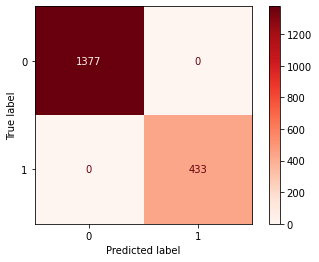

In [88]:
# Evaluasi Performa Model Random Forest

y_pred_train_rf = rf.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train_trim, y_pred_train_rf), '\n')
print('Classification Report : \n', classification_report(y_train_trim, y_pred_train_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train_trim, cmap='Reds'))

> Setelah dilakukan train kemudian dilakukan evaluasi pada hasil train dan didapati nilai f1-score train besnilai 1.00 dan akurasinya 1.00.

In [89]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

f1_score_train_cross_val_rf = cross_val_score(rf, 
                                           X_train_final, 
                                           y_train_trim, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_rf)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_rf.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_rf.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_rf.mean()-f1_score_train_cross_val_rf.std()) , '-', (f1_score_train_cross_val_rf.mean()+f1_score_train_cross_val_rf.std()))

F1 Score - All - Cross Validation  :  [0.47058824 0.49781659 0.46296296]
F1 Score - Mean - Cross Validation :  0.4771225973811812
F1 Score - Std - Cross Validation  :  0.014960332283554045
F1 Score - Range of Test-Set       :  0.46216226509762715 - 0.4920829296647352
CPU times: user 1.57 s, sys: 5.86 ms, total: 1.58 s
Wall time: 1.59 s


F1 Score - Test Set   :  0.5273631840796019 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       468
           1       0.70      0.42      0.53       125

    accuracy                           0.84       593
   macro avg       0.78      0.69      0.72       593
weighted avg       0.83      0.84      0.82       593
 

Confusion Matrix      : 


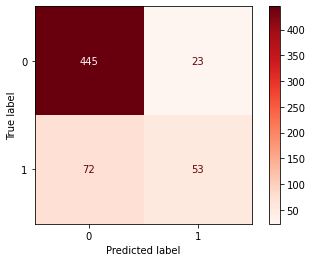

In [90]:
# Cek Performa Model

y_pred_test_rf = rf.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_rf), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_test_final, y_test, cmap='Reds'))

> Dari hasil evaluasi pada data test ditunjukkan bahwa f1-score tets memiliki nilai 0.53 dan akurasi sebesar 0.84 atau 84%.

In [91]:
# Tampilkan Hasil Uji Model

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_rf),
    'train - recall' : recall_score(y_train_trim, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_rf),
    'test - precision' : precision_score(y_test, y_pred_test_rf),
    'test - recall' : recall_score(y_test, y_pred_test_rf),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.839798
test - f1_score,0.527363
test - precision,0.697368
test - recall,0.424000
train - accuracy,1.000000
train - f1_score,1.000000
train - precision,1.000000
train - recall,1.000000


> Dari informasi yang didapatkan dapat diambil simpulan bahwa model data overfit dengan nilai f1-score train adalah 1.00 dan train 0.53.

> Akurasi pada train senilai 100% dan pada test senilai 84%

>

### Model Training Grid Search

In [92]:
# Latih Dengan Grid Search Untuk Menentukan Hyperparameter Terbaik
%%time
# Mennetukan parameter grid

param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rf_gridcv = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring = "f1")


rf_gridcv.fit(X_train_final, y_train_trim)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
CPU times: user 3.34 s, sys: 297 ms, total: 3.64 s
Wall time: 4min 25s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1', verbose=2)

> melakukan training data train menggunakn grid search dengan hyperparameter yang digunakan adalah criterion, n_estimator, max_feature, max_depth dan max_leaf_node.

In [93]:
# Menampilkan Hyperparameters Terbaik Pada Random Forest
rf_gridcv.best_estimator_

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)

In [94]:
rf_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 25}

> Dari hasil train diketahui bahwa hyperparameter terbaik memiliki criterion gini, dengan max_depth 6, max_leaf_node 9, n_estimator 25 dan max_features none.

> Hyperparameter tersebut akan digunakan pada train data test.

In [95]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel rf_gridcv_best

rf_gridcv_best = rf_gridcv.best_estimator_

### Model Evaluation Grid Search

F1 Score - Test Set   :  0.48704663212435223 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       468
           1       0.69      0.38      0.49       125

    accuracy                           0.83       593
   macro avg       0.77      0.67      0.69       593
weighted avg       0.82      0.83      0.81       593
 

Confusion Matrix      : 


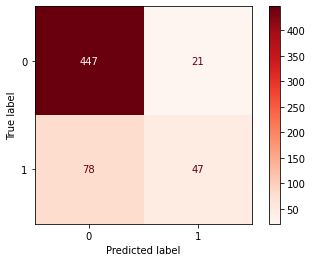

In [96]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_rf_grid = rf_gridcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_rf_grid), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf_grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_final, y_test, cmap='Reds'))

> Dari hasil test diketahui bahwa f1-score test bernilai 0.49 dengan akurasi 83%.

In [97]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_rf),
    'train - recall' : recall_score(y_train_trim, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_rf),
    'test - precision' : precision_score(y_test, y_pred_test_rf_grid),
    'test - recall' : recall_score(y_test, y_pred_test_rf_grid),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf_grid),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf_grid),
}
all_reports['Grid Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - precision,1.000000,1.000000
train - recall,1.000000,1.000000
train - accuracy,1.000000,1.000000
train - f1_score,1.000000,1.000000
test - precision,0.697368,0.691176
test - recall,0.424000,0.376000
test - accuracy_score,0.839798,0.833052
test - f1_score,0.527363,0.487047


> f1-score train mneggunakan grid search memiliki nilai 1.00 dan f1-score testnya memiliki nilai 0.49 yan gmanandakan model yang dibuat overfit.

### Model Training Random Search

In [98]:
random_grid_rf = {'criterion' : ['gini', 'entropy', 'log_loss'],
                  'n_estimators': [25, 50, 100, 150],
                  'max_features': ['sqrt', 'log2', None],
                  'max_depth': [3, 6, 9],
                  'max_leaf_nodes': [3, 6, 9]
                  }
random_grid_rf

{'criterion': ['gini', 'entropy', 'log_loss'],
 'n_estimators': [25, 50, 100, 150],
 'max_features': ['sqrt', 'log2', None],
 'max_depth': [3, 6, 9],
 'max_leaf_nodes': [3, 6, 9]}

In [99]:
# Train with Random Search
%%time

rf_randomcv = RandomizedSearchCV(estimator=rf,
                         param_distributions=random_grid_rf,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1')
rf_randomcv.fit(X_train_final, y_train_trim)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 910 ms, sys: 11.3 ms, total: 921 ms
Wall time: 9.99 s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'n_estimators': [25, 50, 100, 150]},
                   scoring='f1', verbose=2)

In [100]:
# Menampilkan Hyperparameters Terbaik Pada random forest
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=None,
                       max_leaf_nodes=9)

In [101]:
rf_randomcv.best_params_

{'n_estimators': 100,
 'max_leaf_nodes': 9,
 'max_features': None,
 'max_depth': 3,
 'criterion': 'entropy'}

> Hyperparameter terbaik menggunakan rendom search pada random forest classifier yaitu `RandomForestClassifier(criterion='entropy', max_depth=3, max_features=None, max_leaf_nodes=9)`

In [102]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel rf_randomcv_best

rf_randomcv_best = rf_randomcv.best_estimator_

### Model Evaluation Random Search

F1 Score - Test Set   :  0.4895833333333334 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       468
           1       0.70      0.38      0.49       125

    accuracy                           0.83       593
   macro avg       0.78      0.67      0.70       593
weighted avg       0.82      0.83      0.81       593
 

Confusion Matrix      : 


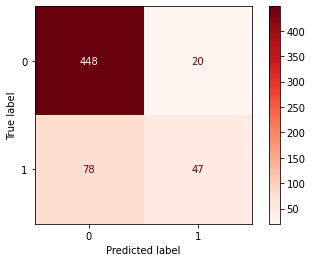

In [103]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_rf_rand = rf_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_rf_rand), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf_rand), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_final, y_test, cmap='Reds'))

> Dari hyperparameter yang sudah ditentukan diatas dialkukan trein terhadap data test yang mana menghasilkan nilai f1-score yaitu 0.49 dan akurasi sebesar 0.83

In [104]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_rf),
    'train - recall' : recall_score(y_train_trim, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_rf),
    'test - precision' : precision_score(y_test, y_pred_test_rf_rand),
    'test - recall' : recall_score(y_test, y_pred_test_rf_rand),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf_rand),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf_rand),
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search,Random Search
train - precision,1.000000,1.000000,1.000000
train - recall,1.000000,1.000000,1.000000
train - accuracy,1.000000,1.000000,1.000000
train - f1_score,1.000000,1.000000,1.000000
test - precision,0.697368,0.691176,0.701493
test - recall,0.424000,0.376000,0.376000
test - accuracy_score,0.839798,0.833052,0.834739
test - f1_score,0.527363,0.487047,0.489583


> Dari hasil pengujian terhadap hyperparameter baseline, terbaik menurut grid search dan random search ditemukan bahwa Hyperparameter baseline merupakan yang terbaik meskipun hasil f1-score train dan f1-score test cenderung overvit.

>  Hyperparameter baseline akan digunakan pada pemodelan.

## KNN

### Model Definition

In [105]:
# Pendefinisian Model knn

knn = KNeighborsClassifier()

### Model Training Baseline

In [106]:
# Training Model knn

knn.fit(X_train_final, y_train_trim)

KNeighborsClassifier()

### Model Evaluation Baseline

F1 Score - Train Set  :  0.5510204081632653 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.95      0.90      1377
           1       0.75      0.44      0.55       433

    accuracy                           0.83      1810
   macro avg       0.80      0.70      0.72      1810
weighted avg       0.82      0.83      0.81      1810
 

Confusion Matrix      : 


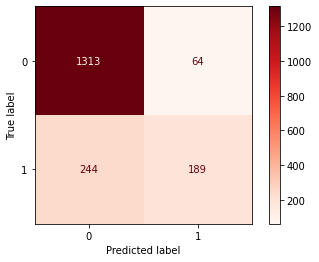

In [107]:
# Evaluasi Performa Model knn

y_pred_train_knn = knn.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train_trim, y_pred_train_knn), '\n')
print('Classification Report : \n', classification_report(y_train_trim, y_pred_train_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_final, y_train_trim, cmap='Reds'))

> Hasil evaluasi train menggunakan KNN menghasilkan nilai f1-score sebesar 0.55 dengan akurasi 0.83%.

In [108]:
# Cross Validation using `cross_val_score`

%%time
f1_score_train_cross_val_knn = cross_val_score(knn, 
                                           X_train_final, 
                                           y_train_trim, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_knn)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_knn.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_knn.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_knn.mean()-f1_score_train_cross_val_knn.std()) , '-', (f1_score_train_cross_val_knn.mean()+f1_score_train_cross_val_knn.std()))

F1 Score - All - Cross Validation  :  [0.38655462 0.4017094  0.3853211 ]
F1 Score - Mean - Cross Validation :  0.39119504149185746
F1 Score - Std - Cross Validation  :  0.007451810588047317
F1 Score - Range of Test-Set       :  0.38374323090381013 - 0.3986468520799048
CPU times: user 175 ms, sys: 0 ns, total: 175 ms
Wall time: 110 ms


F1 Score - Test Set   :  0.4270833333333333 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       468
           1       0.61      0.33      0.43       125

    accuracy                           0.81       593
   macro avg       0.73      0.64      0.66       593
weighted avg       0.79      0.81      0.79       593
 

Confusion Matrix      : 


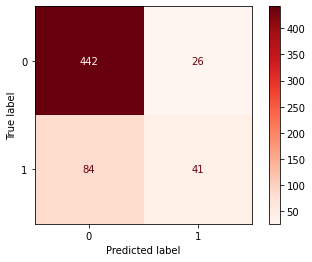

In [109]:
# Cek Performa Model

y_pred_test_knn = knn.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_knn), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_test_final, y_test, cmap='Reds'))

> Pada evaluasi data test diketahui nilai f1-score test bernilai 0.43 dengan akurasi 0.81 dengan menggunakan baseline hyperparameter.

In [110]:
# Tampilkan Hasil Uji Model

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_knn),
    'train - recall' : recall_score(y_train_trim, y_pred_train_knn),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_knn),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_knn),
    'test - precision' : precision_score(y_test, y_pred_test_knn),
    'test - recall' : recall_score(y_test, y_pred_test_knn),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.814503
test - f1_score,0.427083
test - precision,0.611940
test - recall,0.328000
train - accuracy,0.829834
train - f1_score,0.551020
train - precision,0.747036
train - recall,0.436490


> Dari informasi yang didapat diketahui bahwa f1-score train bernilai 0.55 dan test 0.42, model dikatakan overfit meskipun rentangnya tidak terlalu jauh.

> akurasi pada train bernilai 0.83 dan pada test 0.814.

### Model Training Grid Search

In [111]:
# Latih Dengan Grid Search Untuk Menentukan Hyperparameter Terbaik
%%time
# Mennetukan parameter grid

param_grid = {
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights' : ['uniform', 'distance'],
              'n_neighbors': [3, 6, 9],
              'leaf_size': [3, 6, 9]
              }

knn_gridcv = GridSearchCV(estimator=knn, 
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring = "f1")


knn_gridcv.fit(X_train_final, y_train_trim)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: user 225 ms, sys: 17 ms, total: 242 ms
Wall time: 7.66 s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [3, 6, 9], 'n_neighbors': [3, 6, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=2)

In [112]:
# Menampilkan Hyperparameters Terbaik Pada knn
knn_gridcv.best_estimator_

KNeighborsClassifier(leaf_size=3, n_neighbors=3)

In [113]:
knn_gridcv.best_params_

{'algorithm': 'auto', 'leaf_size': 3, 'n_neighbors': 3, 'weights': 'uniform'}

> Hasil latih pada data train menunjukkan hyperparameter terbaik yaitu algorithm': 'auto', 'leaf_size': 3, 'n_neighbors': 3, 'weights': 'uniform'

In [114]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel knn_gridcv_best

knn_gridcv_best = knn_gridcv.best_estimator_

### Model Evaluation Grid Search

F1 Score - Test Set   :  0.44549763033175355 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       468
           1       0.55      0.38      0.45       125

    accuracy                           0.80       593
   macro avg       0.70      0.65      0.66       593
weighted avg       0.78      0.80      0.79       593
 

Confusion Matrix      : 


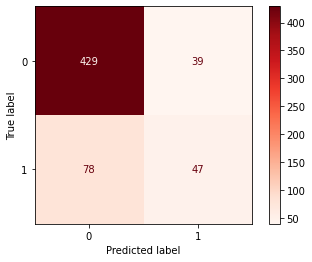

In [115]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_knn_grid = knn_gridcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_knn_grid), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn_grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_gridcv_best, X_test_final, y_test, cmap='Reds'))

> Dari evaluasi model menggunakan grid search yang dilakukan, dikatahui nilai f1-score test bernilai 0.445 dengan akurasi 80%.

In [116]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_knn),
    'train - recall' : recall_score(y_train_trim, y_pred_train_knn),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_knn),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_knn),
    'test - precision' : precision_score(y_test, y_pred_test_knn_grid),
    'test - recall' : recall_score(y_test, y_pred_test_knn_grid),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn_grid),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn_grid),
}
all_reports['Grid Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - precision,0.747036,0.747036
train - recall,0.436490,0.436490
train - accuracy,0.829834,0.829834
train - f1_score,0.551020,0.551020
test - precision,0.611940,0.546512
test - recall,0.328000,0.376000
test - accuracy_score,0.814503,0.802698
test - f1_score,0.427083,0.445498


> Dari informasi yang didapat, f1-score train menggunakan grid search memiliki nilai 0.551 dan fi-score test memiliki nilai 0.445, data dapat dikategorikan overfit. Akurasi train adalah 83% dan test adalah 80% pada saat menggunkan grid search.

### Model Training Random Search

In [117]:
random_grid_knn = {'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'weights' : ['uniform', 'distance'],
                  'n_neighbors': [3, 6, 9],
                  'leaf_size': [3, 6, 9]
                  }
random_grid_knn

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'weights': ['uniform', 'distance'],
 'n_neighbors': [3, 6, 9],
 'leaf_size': [3, 6, 9]}

> Melakukan training menggunakan random search pada datat train knn.

In [118]:
# Train with Random Search
%%time

knn_randomcv = RandomizedSearchCV(estimator=knn,
                         param_distributions=random_grid_knn,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1')
knn_randomcv.fit(X_train_final, y_train_trim)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 64.6 ms, sys: 7.25 ms, total: 71.8 ms
Wall time: 1.13 s


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [3, 6, 9],
                                        'n_neighbors': [3, 6, 9],
                                        'weights': ['uniform', 'distance']},
                   scoring='f1', verbose=2)

In [119]:
# Menampilkan Hyperparameters Terbaik Pada knn
knn_randomcv.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9,
                     weights='distance')

In [120]:
knn_randomcv.best_params_

{'weights': 'distance',
 'n_neighbors': 9,
 'leaf_size': 3,
 'algorithm': 'kd_tree'}

> Setelah dilakuka trin data knn, ditemukan hyperparameter terbaik untuk knn menggunakan random search yaitu dengan hyperparameter `KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9, weights='distance')` yang nantinya akan diujikan pada data test.

In [121]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel knn_randomcv_best

knn_randomcv_best = knn_randomcv.best_estimator_

### Model Evaluation Random Search

F1 Score - Test Set   :  0.3867403314917127 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       468
           1       0.62      0.28      0.39       125

    accuracy                           0.81       593
   macro avg       0.73      0.62      0.64       593
weighted avg       0.79      0.81      0.78       593
 

Confusion Matrix      : 


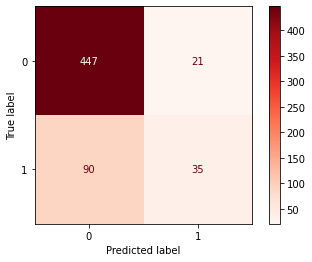

In [122]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_knn_rand = knn_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_knn_rand), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn_rand), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_randomcv_best, X_test_final, y_test, cmap='Reds'))

> Evaluasi model data test, diketahui bahwa nilai f1-score test bernilai 0.39 dan akurasinya sebesar 81%.

In [123]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_knn),
    'train - recall' : recall_score(y_train_trim, y_pred_train_knn),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_knn),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_knn),
    'test - precision' : precision_score(y_test, y_pred_test_knn_rand),
    'test - recall' : recall_score(y_test, y_pred_test_knn_rand),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn_rand),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn_rand),
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search,Random Search
train - precision,0.747036,0.747036,0.747036
train - recall,0.436490,0.436490,0.436490
train - accuracy,0.829834,0.829834,0.829834
train - f1_score,0.551020,0.551020,0.551020
test - precision,0.611940,0.546512,0.625000
test - recall,0.328000,0.376000,0.280000
test - accuracy_score,0.814503,0.802698,0.812816
test - f1_score,0.427083,0.445498,0.386740


> Dari hasil pengujian terhadap hyperparameter baseline, terbaik menurut grid search dan random search ditemukan bahwa Hyperparameter grid Search merupakan yang terbaik meskipun hasil f1-score train dan f1-score test cenderung overvit.

>  Hyperparameter dari hasil pencarian grid search akan digunakan pada pemodelan.

> Hyperparameternya adalah `KNeighborsClassifier(leaf_size=3, n_neighbors=3)`

## Naive Bayes

### Model Definition

In [124]:
# Pendefinisian Model Naive Bayes

nb = GaussianNB()

### Model Training Baseline

In [125]:
# Training Model Naive Bayes

nb.fit(X_train_final, y_train_trim)

GaussianNB()

### Model Evaluation Baseline

F1 Score - Train Set  :  0.5272727272727273 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1377
           1       0.52      0.54      0.53       433

    accuracy                           0.77      1810
   macro avg       0.69      0.69      0.69      1810
weighted avg       0.77      0.77      0.77      1810
 

Confusion Matrix      : 


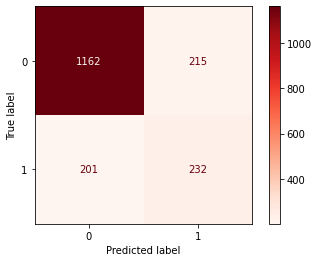

In [126]:
# Evaluasi Performa Model Naive Bayes

y_pred_train_nb = nb.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train_trim, y_pred_train_nb), '\n')
print('Classification Report : \n', classification_report(y_train_trim, y_pred_train_nb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb, X_train_final, y_train_trim, cmap='Reds'))

> Dari hasil train menggunakan baseline naive bayes ditunjukkan bahwa f1-score train bernilai 0.53 dengan akurasi 77%.

In [127]:
# Cross Validation using `cross_val_score`

%%time
f1_score_train_cross_val_nb = cross_val_score(nb, 
                                           X_train_final, 
                                           y_train_trim, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val_nb)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val_nb.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val_nb.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val_nb.mean()-f1_score_train_cross_val_nb.std()) , '-', (f1_score_train_cross_val_nb.mean()+f1_score_train_cross_val_nb.std()))

F1 Score - All - Cross Validation  :  [0.53146853 0.50344828 0.50803859]
F1 Score - Mean - Cross Validation :  0.5143184641798678
F1 Score - Std - Cross Validation  :  0.01227086905315204
F1 Score - Range of Test-Set       :  0.5020475951267158 - 0.5265893332330198
CPU times: user 27.2 ms, sys: 6 µs, total: 27.2 ms
Wall time: 30.4 ms


F1 Score - Test Set   :  0.5185185185185185 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       468
           1       0.53      0.50      0.52       125

    accuracy                           0.80       593
   macro avg       0.70      0.69      0.70       593
weighted avg       0.80      0.80      0.80       593
 

Confusion Matrix      : 


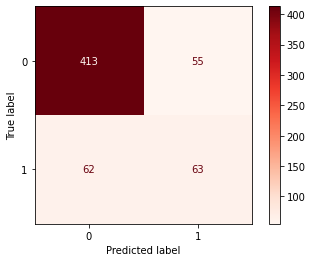

In [128]:
# Cek Performa Model

y_pred_test_nb = nb.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_nb), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_nb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb, X_test_final, y_test, cmap='Reds'))

>

> Dari hasil train menggunakan baseline naive bayes pada data test ditunjukkan bahwa f1-score test bernilai 0.52 dengan akurasi 80%.

In [129]:
# Tampilkan Hasil Uji Model

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_nb),
    'train - recall' : recall_score(y_train_trim, y_pred_train_nb),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_nb),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_nb),
    'test - precision' : precision_score(y_test, y_pred_test_nb),
    'test - recall' : recall_score(y_test, y_pred_test_nb),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_nb),
    'test - f1_score' : f1_score(y_test, y_pred_test_nb),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.802698
test - f1_score,0.518519
test - precision,0.533898
test - recall,0.504000
train - accuracy,0.770166
train - f1_score,0.527273
train - precision,0.519016
train - recall,0.535797


> Dari informasi yang didapat diatas, naive bayes dengan baseline hyperparameter memiliki model yang goodfit karena nilai f1-score train bernilai 0.53 dan f1-score test bernilai 0.52.

### Model Training Grid Search

In [130]:
# Latih Dengan Grid Search Untuk Menentukan Hyperparameter Terbaik
%%time
# Mennetukan parameter grid

param_grid = {
              'var_smoothing': np.logspace(0,-9, num=100)
              }

nb_gridcv = GridSearchCV(estimator=nb, 
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring = "f1")


nb_gridcv.fit(X_train_final, y_train_trim)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: user 163 ms, sys: 13.1 ms, total: 176 ms
Wall time: 1.82 s


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=2)

> Dilakukan train pada data train menggunakan hyperparameter grid search.

In [131]:
# Menampilkan Hyperparameters Terbaik Pada gausianNB
nb_gridcv.best_estimator_

GaussianNB(var_smoothing=0.004328761281083057)

>

> Dari hasil train naive bayes dengan grid search diketahui bahwa hyperparameter terbaik menggunakan nilai var-smoothing = 0.004328761281083057.

> Hyperparameter tersebut akan diggunakan pada saat training data test.

In [132]:
nb_gridcv.best_params_

{'var_smoothing': 0.004328761281083057}

In [133]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel logreg_gridcv_best

nb_gridcv_best = nb_gridcv.best_estimator_

### Model Evaluation Grid Search

F1 Score - Test Set   :  0.5228215767634855 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       468
           1       0.54      0.50      0.52       125

    accuracy                           0.81       593
   macro avg       0.71      0.70      0.70       593
weighted avg       0.80      0.81      0.80       593
 

Confusion Matrix      : 


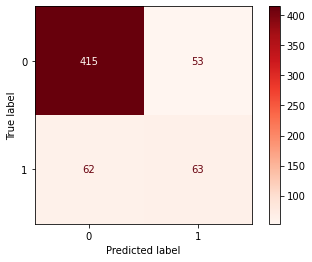

In [134]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_nb_grid = nb_gridcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_nb_grid), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_nb_grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb_gridcv_best, X_test_final, y_test, cmap='Reds'))

> Nilai f1-score test pada gid search naive bayer memiliki nilai 0.52 dengan nilai akurasi 81%

In [135]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_nb),
    'train - recall' : recall_score(y_train_trim, y_pred_train_nb),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_nb),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_nb),
    'test - precision' : precision_score(y_test, y_pred_test_nb_grid),
    'test - recall' : recall_score(y_test, y_pred_test_nb_grid),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_nb_grid),
    'test - f1_score' : f1_score(y_test, y_pred_test_nb_grid),
}
all_reports['Grid Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - precision,0.519016,0.519016
train - recall,0.535797,0.535797
train - accuracy,0.770166,0.770166
train - f1_score,0.527273,0.527273
test - precision,0.533898,0.543103
test - recall,0.504000,0.504000
test - accuracy_score,0.802698,0.806071
test - f1_score,0.518519,0.522822


> Dari hasil f1-score train grid search diketahui nilainya 0.77 dan f1-score test bernilai 0.52 yang manandakan model yang dibuat overfit.

### Model Training Random Search

In [136]:
random_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)
                  }
random_grid_nb

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
        4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
        1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
        8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
        3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
        1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
        6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
        2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
        1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
        5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
        2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
        1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
        4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
        1.87381742e-05, 1.51991108e-05, 1.23284

In [137]:
# Train with Random Search
%%time

nb_randomcv = RandomizedSearchCV(estimator=nb,
                         param_distributions=random_grid_nb,
                         cv=3,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1')
nb_randomcv.fit(X_train_final, y_train_trim)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 234 ms, sys: 12.2 ms, total: 246 ms
Wall time: 390 ms


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   scoring='f1', verbose=2)

In [138]:
# Menampilkan Hyperparameters Terbaik Pada Logritic Regression
nb_randomcv.best_estimator_

GaussianNB(var_smoothing=0.02310129700083159)

In [139]:
nb_randomcv.best_params_

{'var_smoothing': 0.02310129700083159}

In [140]:
# Menyimpan Hyperparameter terbaik Untuk Uji Untuk Uji Data pada Variabel logreg_gridcv_best

nb_randomcv_best = nb_randomcv.best_estimator_

### Model Evaluation Random Search

F1 Score - Test Set   :  0.5294117647058824 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       468
           1       0.56      0.50      0.53       125

    accuracy                           0.81       593
   macro avg       0.71      0.70      0.71       593
weighted avg       0.80      0.81      0.81       593
 

Confusion Matrix      : 


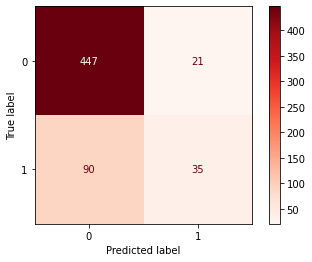

In [141]:
# Cek Performa Model Menggunakan Hyperparameter Terbaik

y_pred_test_nb_rand = nb_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_nb_rand), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_nb_rand), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_randomcv_best, X_test_final, y_test, cmap='Reds'))

In [142]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_trim, y_pred_train_nb),
    'train - recall' : recall_score(y_train_trim, y_pred_train_nb),
    'train - accuracy' : accuracy_score(y_train_trim, y_pred_train_nb),
    'train - f1_score' : f1_score(y_train_trim, y_pred_train_nb),
    'test - precision' : precision_score(y_test, y_pred_test_nb_rand),
    'test - recall' : recall_score(y_test, y_pred_test_nb_rand),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_nb_rand),
    'test - f1_score' : f1_score(y_test, y_pred_test_nb_rand)
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search,Random Search
train - precision,0.519016,0.519016,0.519016
train - recall,0.535797,0.535797,0.535797
train - accuracy,0.770166,0.770166,0.770166
train - f1_score,0.527273,0.527273,0.527273
test - precision,0.533898,0.543103,0.557522
test - recall,0.504000,0.504000,0.504000
test - accuracy_score,0.802698,0.806071,0.811130
test - f1_score,0.518519,0.522822,0.529412


> Dari hasil f1-score train menggunakan random search diketahui nilainya 0.53 dan f1-score test bernilai 0.53 yang menandakan model menggunakna hyperparameter tuning menggunakan random search goodfit.

> Pada Naive bayes, hyperparameter dari random search akan digunakan pada pemodelan.

> Hyperparameternya adalah `GaussianNB(var_smoothing=0.02310129700083159)`

# Model Saving

> Dari seluruh Algoritme yang diujikan dan melihat nilai standar deviasi hasil cross validation saya memilih KNN untuk dijadikan inference karena nilai standar deviasinya paling rendah.
```
F1 Score - All - Cross Validation  :  [0.38655462 0.4017094  0.3853211]`
F1 Score - Mean - Cross Validation :  0.39119504149185746
F1 Score - Std - Cross Validation  :  0.007451810588047317
F1 Score - Range of Test-Set       :  0.38374323090381013 - 0.3986468520799048
```
> Nilai standar deviasi yang semakin kecil menandakan data lebih terkonsentrasi atau homogen dalam rentang nilai yang lebih kecil.

> Nilai rataan juga berada dalam rentang yang tidak terlalu jauh dari range data yang ada.

In [145]:
# Simpan model

with open('knn.pkl', 'wb') as file_1:
  joblib.dump(knn, file_1)

with open('scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('num_column.txt', 'w') as file_3:
  json.dump(num_columns, file_3)


# Conceptual Problem

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

> Metode pada decision tree yang digunakan untuk a memilih variabel mana yang akan dipilih sebagai node pemisah untuk membagi himpunan data menjadi dua bagian. Disini saya menggunakan criterion gini, yang mana criterion gini digunkan untuk mengecek impurity agar data yang dipisah sesuai dengan labelnya atau data bisa homogen.

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

> Pruning digunakan untuk mengurangi kompleksitas model agar tidak terjadi overfit pada model yang dibuat.

> Pre-pruning: proses penghentian pembentukan tree sebelum mencapai kondisi overfitting dengan cara mengatur beberapa aturan pruning di awal proses.

> Post-pruning: proses pengurangan kompleksitas pada tre.

> Minimal cost complexity pruning: teknik pruning yang digunakan untuk mencari nilai alpha terbaik agar model decision tree memiliki error terendah. Alpha merupakan nilai trade-off antara jumlah cabang dalam tree dan error dalam model.

3. Bagaimana cara memilih K yang optimal pada KNN ?

> yang saya lakukan dengan mencoba imputasinilai k, namum beberapa literatur menunjukkan untuk menggunkan elbow method dan cross validation untuk menentukannilai K yang optimal.

4. Jelaskan apa yang dimaksud dengan Cross Validation !

> Cross validation bertujuan untuk memperkirakan performa model pada data yang belum pernah dilihat sebelumnya (data tets) dengan menggunakan data yang tersedia (data train) untuk melatih model.

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

> Accuracy digunakan untuk mengukur seberapa banyak prediksi model yang benar dari total prediksi yang dilakukan. Accuracy cocok digunakan pada dataset yang memiliki keseimbangan antara kelas positif dan negatif.

> Precision digunakan untuk mengukur seberapa banyak prediksi positif yang benar dari total prediksi positif yang dilakukan. Precision cocok digunakan pada kasus di mana kita ingin menghindari prediksi positif yang salah.

> Recall digunakan untuk mengukur seberapa banyak prediksi positif yang benar dari total jumlah kasus positif yang sebenarnya. Recall digunakan pada kasus di mana kita ingin menghindari kasus positif yang terlewat.

>F1 Score digunakan untuk menggabungkan nilai precision dan recall menjadi satu nilai. Nilai ini berguna ketika kita ingin mempertimbangkan keduanya secara bersamaan. F1 score digunakan untuk mengkombinasikan precision dan recall menjadi satu skor pada kasus data imbalance.

# Kesimpulan

> Membantu menyelesaikan masalah yang ada yaitu mengklasifikasikan apakah nasabah dapt membayar cicilan kartu kredit bulan selanjutnya atau tidak.

> Pengguna kartu kredit didominasi wanita dengan rentang usia 24 sampai 36 tahun dengan latar belakang pendidikan lulusan universitas.

> Dari 6 algoritme yang dilakukan pengujian ternyata KNN dapat dikatakan memberi hasil terbaik dimana data train dan data test good fit dan pengujian menggunakan cross validation pada f1 menunjukkan bahwa standar deviasainya kecil yang berarti datanya homogen dan berada pada rentang data yang kecil.

> KNN memiliki kelemahan dalam handling data yang banyak, sangat terpengaruh outliers dan kta harus menetukan nilai K, baik dengan elbow method maupun dengan cara lain seperti cross validation.
